In [1]:
url = "https://www.worldometers.info/coronavirus/"

# !pip install beautifulsoup4
# !pip install lxml
# !pip install requests
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib

In [2]:
import requests


In [3]:
html = requests.get(url).content

In [4]:
type(html)

bytes

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID Live - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t
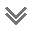

In [5]:
html


In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(html, 'html.parser')

In [8]:
tb = soup.find("tbody")

In [9]:
tr= tb.find_all('tr')

In [10]:
tr[9]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">2</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/india/">India</a></td>
<td style="font-weight: bold; text-align:right">44,681,523</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">530,722                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">44,147,322</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">3,479</td>
<td style="font-weight: bold; text-align:right">698</td>
<td style="font-weight: bold; text-align:right">31,765</td>
<td style="font-weight: bold; text-align:right">377</td>
<td style="font-weight: bold; text-align:right">912,362,106</td>
<td style="font-weight: bold; text-align:right">648,615</td>


In [11]:
all_data = []
for index in range(8, len(tr)):
    country_data = []
    table_row = tr[index]
    table_data = table_row.find_all('td')
    
    for item in table_data:
           country_data.append(item.text)
    all_data.append(country_data)

In [12]:
all_data

[['1',
  'USA',
  '103,151,843',
  '',
  '1,121,725                                ',
  '',
  '100,061,532',
  '',
  '1,968,586',
  '4,815',
  '308,095',
  '3,350',
  '1,155,997,944',
  '3,452,747',
  '334,805,269 ',
  'North America',
  '3',
  '298',
  '0',
  '',
  '',
  '5,880'],
 ['2',
  'India',
  '44,681,523',
  '',
  '530,722                                ',
  '',
  '44,147,322',
  '',
  '3,479',
  '698',
  '31,765',
  '377',
  '912,362,106',
  '648,615',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,650',
  '2',
  '',
  '',
  '2'],
 ['3',
  'France',
  '39,421,144',
  '',
  '163,105                                ',
  '',
  '38,862,625',
  '',
  '395,414',
  '869',
  '601,074',
  '2,487',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '402',
  '0',
  '',
  '',
  '6,029'],
 ['4',
  'Germany',
  '37,562,191',
  '',
  '163,244                                ',
  '',
  '36,946,600',
  '+40,900',
  '452,347',
  '1,281',
  '447,789',
  '1,946',
  '122,332,384',
  

In [13]:
# 1:10 ra 14

In [14]:
data = list(map(lambda x : x[1:10]+ [x[14]], all_data))

In [15]:
data

[['USA',
  '103,151,843',
  '',
  '1,121,725                                ',
  '',
  '100,061,532',
  '',
  '1,968,586',
  '4,815',
  '334,805,269 '],
 ['India',
  '44,681,523',
  '',
  '530,722                                ',
  '',
  '44,147,322',
  '',
  '3,479',
  '698',
  '1,406,631,776 '],
 ['France',
  '39,421,144',
  '',
  '163,105                                ',
  '',
  '38,862,625',
  '',
  '395,414',
  '869',
  '65,584,518 '],
 ['Germany',
  '37,562,191',
  '',
  '163,244                                ',
  '',
  '36,946,600',
  '+40,900',
  '452,347',
  '1,281',
  '83,883,596 '],
 ['Brazil',
  '36,560,497',
  '',
  '695,031                                ',
  '',
  '35,429,017',
  '',
  '436,449',
  '8,318',
  '215,353,593 '],
 ['Japan',
  '30,647,859',
  '',
  '60,411                                ',
  '',
  '21,271,832',
  '',
  '9,315,616',
  '656',
  '125,584,838 '],
 ['S. Korea',
  '29,654,090',
  '+54,343',
  '32,745                                ',
  '+76',
  

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9
0,USA,"103,151,843",,"1,121,725",,"100,061,532",,"1,968,586","4,815","334,805,269"
1,India,"44,681,523",,"530,722",,"44,147,322",,"3,479",698,"1,406,631,776"
2,France,"39,421,144",,"163,105",,"38,862,625",,"395,414",869,"65,584,518"
3,Germany,"37,562,191",,"163,244",,"36,946,600","+40,900","452,347","1,281","83,883,596"
4,Brazil,"36,560,497",,"695,031",,"35,429,017",,"436,449","8,318","215,353,593"
...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29,,,,29,,0,,799
227,Western Sahara,10,,1,,9,,0,,"626,161"
228,MS Zaandam,9,,2,,7,,0,,
229,Tokelau,5,,,,,,5,,"1,378"


In [19]:
y = ['Country', 
           "Total Case",
           'New Case', 
           'Total Death', 
           'New Death', 
           'Total Recovered',
           'New Recovered', 
           'Active Cases', 
           'Serious',
           'Population']

In [20]:
len(y)

10

In [21]:
df.columns = y

In [22]:
df.head(20)

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
0,USA,"103,151,843",,"1,121,725",,"100,061,532",,"1,968,586","4,815","334,805,269"
1,India,"44,681,523",,"530,722",,"44,147,322",,"3,479",698,"1,406,631,776"
2,France,"39,421,144",,"163,105",,"38,862,625",,"395,414",869,"65,584,518"
3,Germany,"37,562,191",,"163,244",,"36,946,600","+40,900","452,347","1,281","83,883,596"
4,Brazil,"36,560,497",,"695,031",,"35,429,017",,"436,449","8,318","215,353,593"
5,Japan,"30,647,859",,"60,411",,"21,271,832",,"9,315,616",656,"125,584,838"
6,S. Korea,"29,654,090","+54,343","32,745",+76,"28,567,938","+66,005","1,053,407",540,"51,329,899"
7,Italy,"25,279,682",,"185,417",,"24,688,083",,"406,182",319,"60,262,770"
8,UK,"24,210,131",,"201,028",,"23,895,374","+6,508","113,729",146,"68,497,907"
9,Russia,"21,832,768",,"394,168",,"21,253,611",,"184,989","2,300","145,805,947"


In [23]:
df.tail(20)

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
211,Sao Tome and Principe,"6,279",,77,,"6,202",,0,,"227,679"
212,Palau,"5,976",,9,,"5,965",,2,1,"18,233"
213,St. Barth,"5,418",,6,,N/A,N/A,N/A,,"9,945"
214,Nauru,"4,621",,1,,"4,609",,11,,"10,903"
215,Anguilla,"3,904",,12,,"3,879",,13,4,"15,230"
216,Kiribati,"3,430",,13,,"2,703",,714,3,"123,419"
217,Wallis and Futuna,"3,427",,7,,438,,"2,982",,"10,982"
218,Macao,"3,360",,91,,"3,047",,222,,"667,490"
219,Saint Pierre Miquelon,"3,349",,2,,"2,449",,898,1,"5,759"
220,Tuvalu,"2,805",,,,,,"2,805",,"12,066"


In [28]:
df.to_csv('Covid Data-Jan-11.csv', index = False) # Comma Seperated Value(CSV) 

# Read CSV file

In [29]:
df = pd.read_csv('Covid Data-Jan-11.csv')

In [30]:
df.head()

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
0,USA,"103,151,843",NaN,"1,121,725",NaN,"100,061,532",NaN,"1,968,586","4,815","334,805,269"
1,India,"44,681,523",NaN,"530,722",NaN,"44,147,322",NaN,"3,479",698,"1,406,631,776"
2,France,"39,421,144",NaN,"163,105",NaN,"38,862,625",NaN,"395,414",869,"65,584,518"
3,Germany,"37,562,191",NaN,"163,244",NaN,"36,946,600","+40,900","452,347","1,281","83,883,596"
4,Brazil,"36,560,497",NaN,"695,031",NaN,"35,429,017",NaN,"436,449","8,318","215,353,593"


# NaN means Missing data

In [27]:
df.isnull()

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
0,False,False,True,False,True,False,True,False,False,False
1,False,False,True,False,True,False,True,False,False,False
2,False,False,True,False,True,False,True,False,False,False
3,False,False,True,False,True,False,False,False,False,False
4,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
226,False,False,True,False,True,False,True,False,True,False
227,False,False,True,False,True,False,True,False,True,False
228,False,False,True,False,True,False,True,False,True,False
229,False,False,True,False,True,True,True,False,True,False


In [31]:
True + True

2

In [32]:
True+ False


1

In [33]:
False + False

0

In [34]:
df.isnull().sum()

Country              0
Total Case           0
New Case           223
Total Death          0
New Death          227
Total Recovered     21
New Recovered      215
Active Cases        19
Serious             95
Population           0
dtype: int64

<AxesSubplot: >

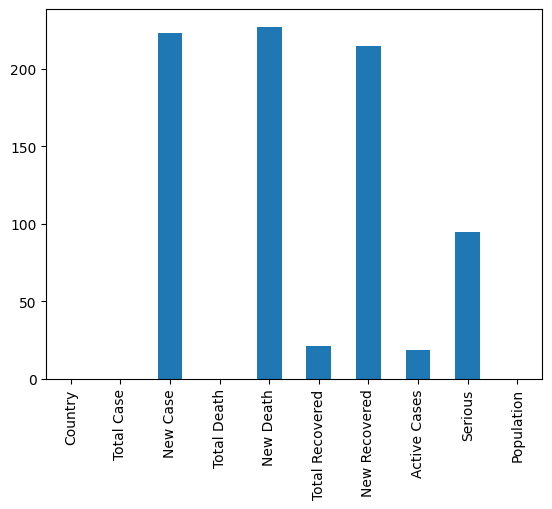

In [36]:
df.isnull().sum().plot.bar()

<AxesSubplot: >

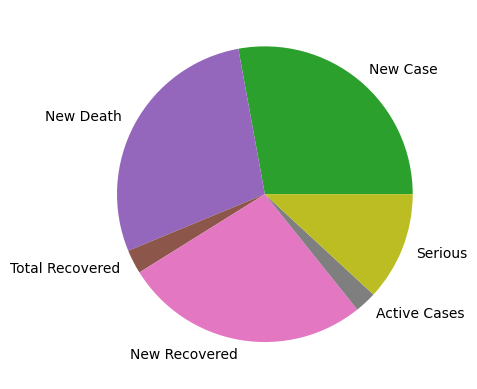

In [37]:
df.isnull().sum().plot.pie()

# Heatmap plot of missing data

In [38]:
import seaborn as sns

In [40]:
df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
Country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Case,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Case,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total Death,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Death,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total Recovered,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
New Recovered,True,True,True,False,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
Active Cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Serious,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
Population,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

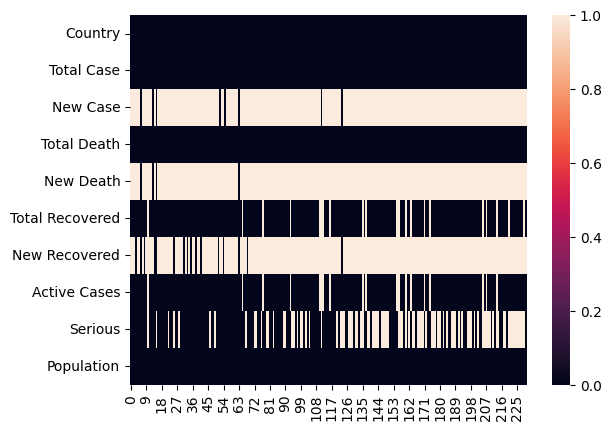

In [43]:
sns.heatmap(df.isnull().transpose())

NameError: name 'transpose' is not defined

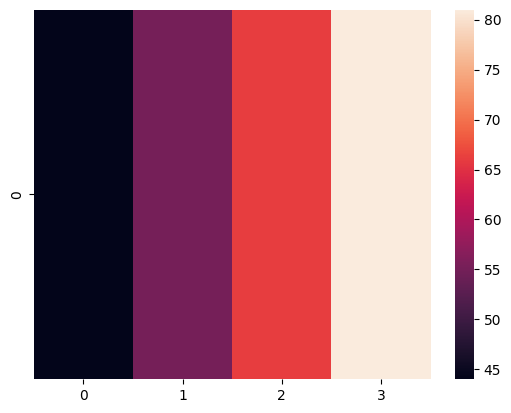

In [46]:
sns.heatmap([[44,55,66,81]])

<AxesSubplot: >

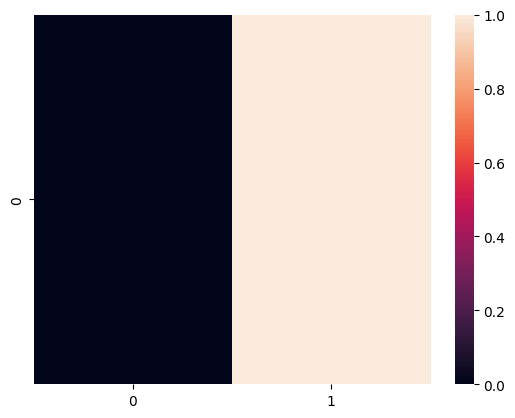

In [48]:
sns.heatmap([[0,1]])

<AxesSubplot: >

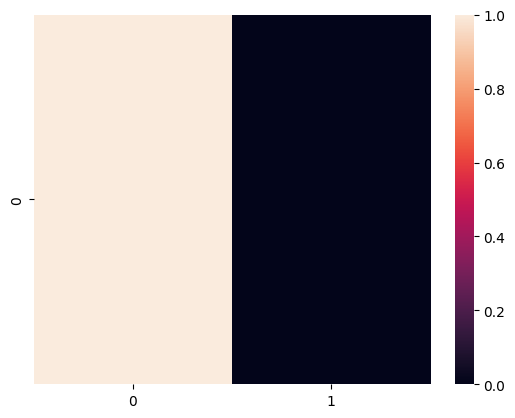

In [50]:
sns.heatmap([[True, False]])

In [51]:
df.head()

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
0,USA,"103,151,843",NaN,"1,121,725",NaN,"100,061,532",NaN,"1,968,586","4,815","334,805,269"
1,India,"44,681,523",NaN,"530,722",NaN,"44,147,322",NaN,"3,479",698,"1,406,631,776"
2,France,"39,421,144",NaN,"163,105",NaN,"38,862,625",NaN,"395,414",869,"65,584,518"
3,Germany,"37,562,191",NaN,"163,244",NaN,"36,946,600","+40,900","452,347","1,281","83,883,596"
4,Brazil,"36,560,497",NaN,"695,031",NaN,"35,429,017",NaN,"436,449","8,318","215,353,593"


In [53]:
df.loc[df.Country == 'Nepal']

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
72,Nepal,"1,001,031",NaN,"12,020",NaN,"988,986",NaN,25,NaN,"30,225,582"


In [55]:
df.loc[df.Country == 'Japan']

,Country,Total Case,New Case,Total Death,New Death,Total Recovered,New Recovered,Active Cases,Serious,Population
5,Japan,"30,647,859",NaN,"60,411",NaN,"21,271,832",NaN,"9,315,616",656,"125,584,838"


In [57]:
df['Country'].head(10)

0         USA
1       India
2      France
3     Germany
4      Brazil
5       Japan
6    S. Korea
7       Italy
8          UK
9      Russia
Name: Country, dtype: object

In [58]:
type(df['Country'])

pandas.core.series.Series

In [60]:
type(df['Country'].head(10))

pandas.core.series.Series

# Scatterplot

In [64]:
import matplotlib.pyplot as plt

In [66]:
x = range(8, 50, 2)
y = [item* 0.1 for item in x]

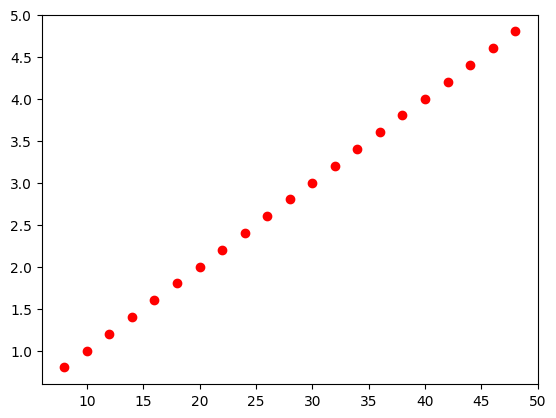

In [70]:
plt.scatter(x =x, y=y, color = 'red' )

# line chart

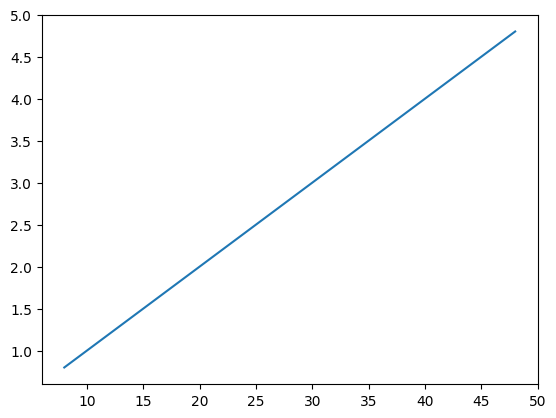

In [68]:
plt.plot(x,y)

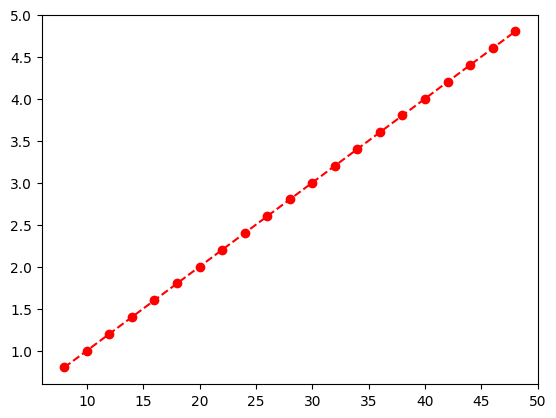

In [77]:
plt.plot(x,y, 'o--', color = 'r')